In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt
import joblib

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [4]:
fishers_dict = od()

## Instantiate Fisher classes

## with IA

### Year **3** single source bin

In [5]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2pt at A_IA param.
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3IAsingle2x2pt'] = fisher2x2pt
fishers_dict['Y3IAsingle1x2pt'] = fisher1x2pt
fishers_dict['Y3IAsingle3x2pt'] = fisher3x2pt
fishers_dict['Y3IAsingle2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAsingle1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAsingle3x2ptPrior'] = fisher3x2ptPrior

### year 3 double source bins

In [6]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3IAdouble2x2pt'] = fisher2x2pt
fishers_dict['Y3IAdouble1x2pt'] = fisher1x2pt
fishers_dict['Y3IAdouble3x2pt'] = fisher3x2pt
fishers_dict['Y3IAdouble2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAdouble1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAdouble3x2ptPrior'] = fisher3x2ptPrior

### Year 3 quadruple source bins

In [7]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY3IA/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 100, 100], # to avoid singular Fisher matrix of 2x2p
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4', 'A_IA', 'eta_IA'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3IAquadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3IAquadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3IAquadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3IAquadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3IAquadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3IAquadruple3x2ptPrior'] = fisher3x2ptPrior

## without IA

### Year **3** single source bin

In [8]:
fisher1x2pt = joblib.load('FisherMats/single_source_ClY3/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/single_source_ClY3/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/single_source_ClY3/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3single2x2pt'] = fisher2x2pt
fishers_dict['Y3single1x2pt'] = fisher1x2pt
fishers_dict['Y3single3x2pt'] = fisher3x2pt
fishers_dict['Y3single2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3single1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3single3x2ptPrior'] = fisher3x2ptPrior

### year 3 double source bins

In [9]:
fisher1x2pt = joblib.load('FisherMats/double_source_ClY3/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/double_source_ClY3/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/double_source_ClY3/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3double2x2pt'] = fisher2x2pt
fishers_dict['Y3double1x2pt'] = fisher1x2pt
fishers_dict['Y3double3x2pt'] = fisher3x2pt
fishers_dict['Y3double2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3double1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3double3x2ptPrior'] = fisher3x2ptPrior

### Year 3 quadruple source bins

In [10]:
fisher1x2pt = joblib.load('FisherMats/quadruple_source_ClY3/fisher1x2pt.cmp')
fisher2x2pt = joblib.load('FisherMats/quadruple_source_ClY3/fisher2x2pt.cmp')
fisher3x2pt = joblib.load('FisherMats/quadruple_source_ClY3/fisher3x2pt.cmp')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3quadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3quadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3quadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3quadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3quadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3quadruple3x2ptPrior'] = fisher3x2ptPrior

## Plot

In [11]:
corner = hsc3x2pt.corner_class()

### 3x2pt: single vs double vs quadruple

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt IA (Y3, 1bin) + Prior",0.05153,0.04751,0.04445
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974


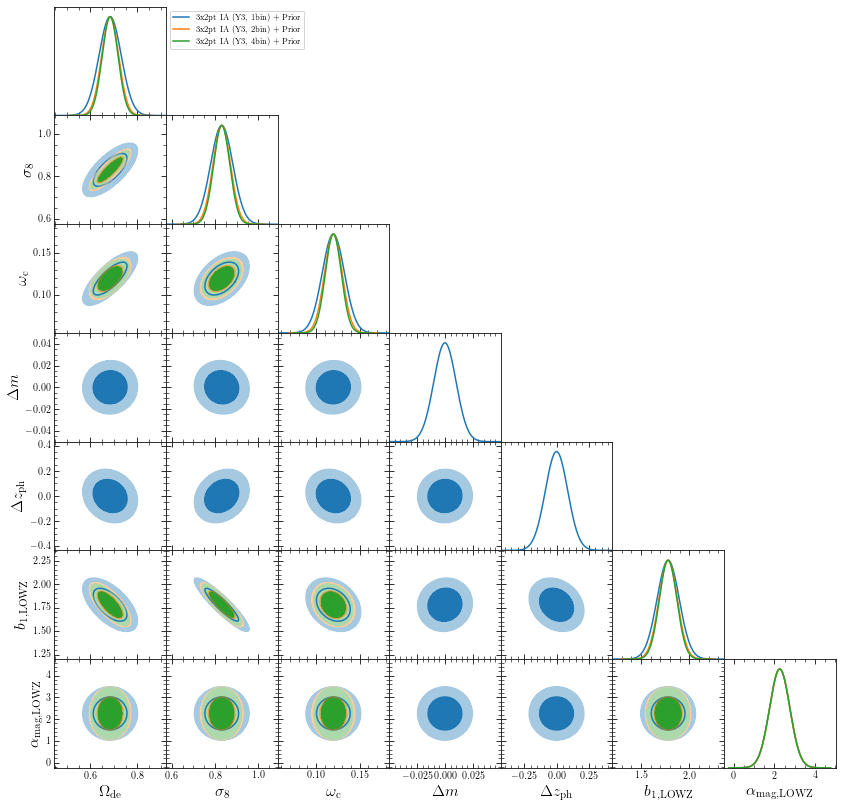

In [24]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974


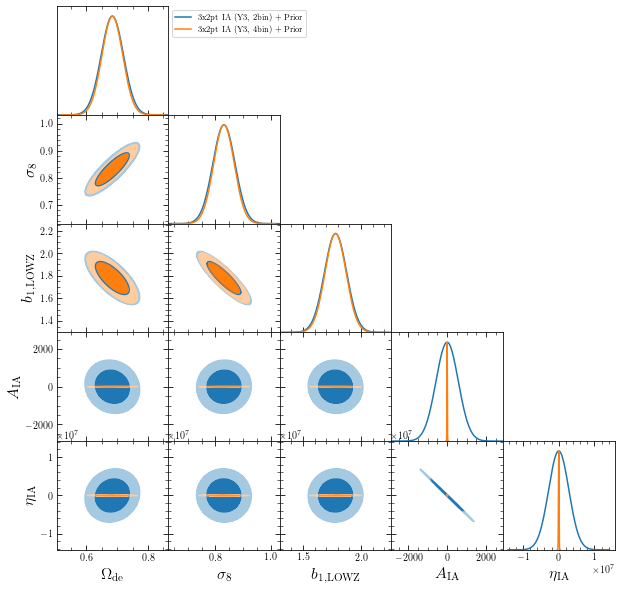

In [15]:
fishers = [fishers_dict[key] for key in ['Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'b1lowz', 'A_IA', 'eta_IA'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [14]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

print(df.to_latex(escape=False))

with open('figures/Y3IA_single_double_quadruple_table.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

\begin{tabular}{llll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ \\
\midrule
3x2pt IA (Y3, 1bin) + Prior &    0.05153 &              0.04751 &    0.04445 \\
3x2pt IA (Y3, 2bin) + Prior &    0.04040 &              0.03628 &    0.02455 \\
3x2pt IA (Y3, 4bin) + Prior &    0.03728 &              0.03366 &    0.01974 \\
\bottomrule
\end{tabular}



,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt IA (Y3, 1bin) + Prior",0.05153,0.04751,0.04445
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974


Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.29433827394707557
Optimizing alpha of S8 to 0.3599695285604198
Optimizing alpha of S8 to 0.37527206426302145


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt IA (Y3, 1bin) + Prior",0.05153,0.04751,0.04445,0.03536
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455,0.02059
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974,0.01608


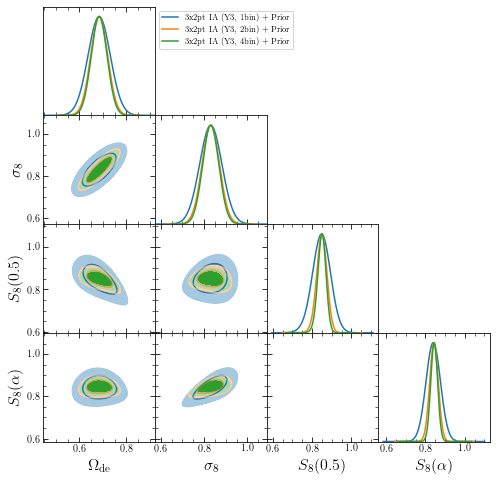

In [12]:
fishers = [fishers_dict[key] for key in ['Y3IAsingle3x2ptPrior', 'Y3IAdouble3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946
Optimizing alpha of S8 to 0.3440764848240576
Optimizing alpha of S8 to 0.39375974371267747
Optimizing alpha of S8 to 0.4043326878215946


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518,0.03030
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724,0.02433
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391,0.02207


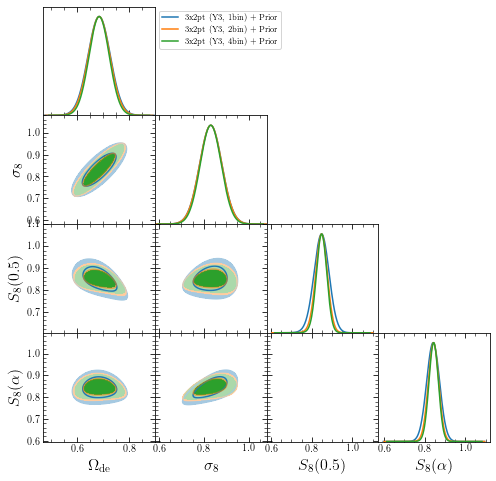

In [13]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

## 1+2 -> 3x2pt

Optimizing alpha of S8 to 0.3887017470134007
Optimizing alpha of S8 to 0.52790531382806
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.3887017470134007
Optimizing alpha of S8 to 0.52790531382806
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.3887017470134007
Optimizing alpha of S8 to 0.52790531382806
Optimizing alpha of S8 to 0.37527206426302145
Optimizing alpha of S8 to 0.3887017470134007
Optimizing alpha of S8 to 0.52790531382806
Optimizing alpha of S8 to 0.37527206426302145


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"Cosmic Shear IA (Y3, 4bin) + Prior",0.07049,0.06651,0.02626,0.01935
"2x2pt IA (Y3, 4bin) + Prior",0.10195,0.05822,0.06197,0.06197
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974,0.01608


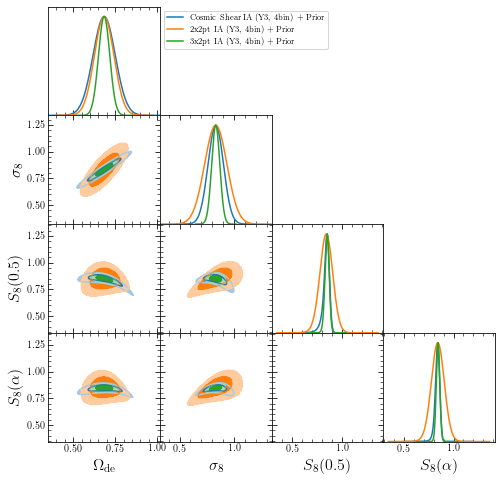

In [16]:
fishers = [fishers_dict[key] for key in ['Y3IAquadruple1x2ptPrior','Y3IAquadruple2x2ptPrior','Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8', 'S8opt'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3IAsingle3x2ptPrior_fY3IAdouble3x2ptPrior_fY3IAquadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

## with and without IA

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 1bin) + Prior",0.04984,0.04298,0.03518
"3x2pt IA (Y3, 1bin) + Prior",0.05153,0.04751,0.04445


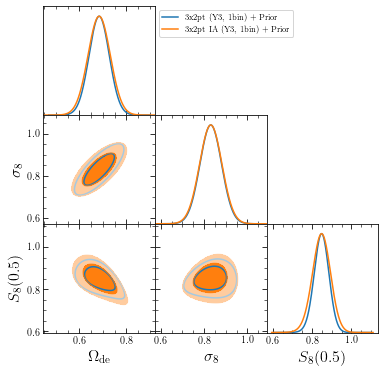

In [29]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3IAsingle3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 2bin) + Prior",0.04962,0.04148,0.02724
"3x2pt IA (Y3, 2bin) + Prior",0.04040,0.03628,0.02455


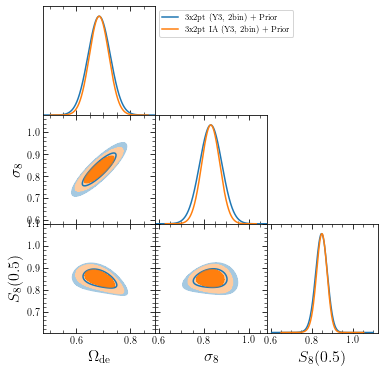

In [30]:
fishers = [fishers_dict[key] for key in ['Y3double3x2ptPrior', 'Y3IAdouble3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$
"3x2pt (Y3, 4bin) + Prior",0.04689,0.03876,0.02391
"3x2pt IA (Y3, 4bin) + Prior",0.03728,0.03366,0.01974


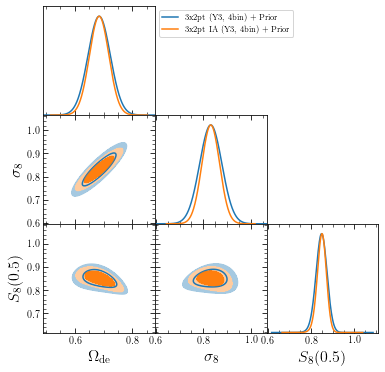

In [31]:
fishers = [fishers_dict[key] for key in ['Y3quadruple3x2ptPrior', 'Y3IAquadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])